In [21]:
import pandas as pd
import numpy as np

In [22]:
# Download csv file from resources and put it in working directory
dataframe = pd.read_csv(r"C:\Users\kverm\Downloads\Electric_Production.csv",header=0)

In [23]:
dataframe.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [24]:
dataframe.DATE.dtype

dtype('O')

In [25]:
df2 = pd.read_csv(r"C:\Users\kverm\Downloads\Electric_Production.csv", header=0, parse_dates=['DATE'])

In [26]:
df2.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [27]:
df2.DATE.dtype

dtype('<M8[ns]')

In [28]:
df2.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

<AxesSubplot:>

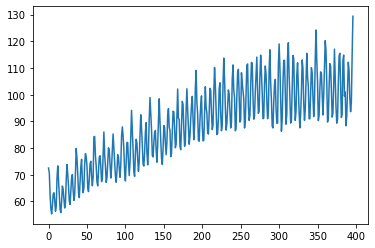

In [30]:
df2['Value'].plot()

In [31]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

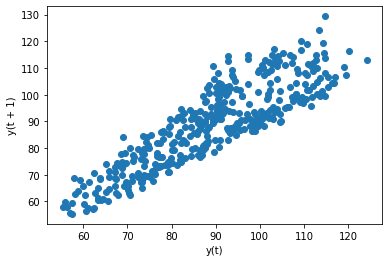

In [32]:
lag_plot(df2['Value'])

In [33]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

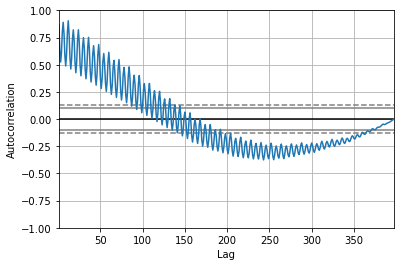

In [34]:
autocorrelation_plot(df2['Value'])

In [35]:
import seaborn as sns

<AxesSubplot:ylabel='Value'>

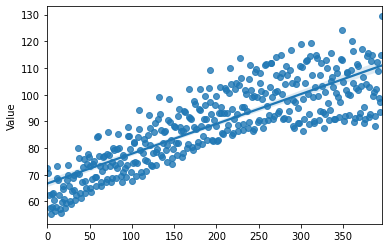

In [36]:
sns.regplot(x= df2.index.values, y=df2['Value'])

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf

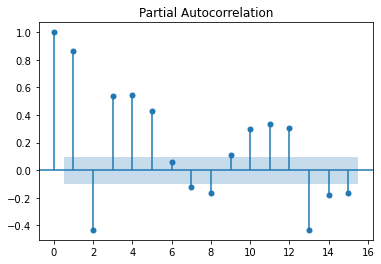

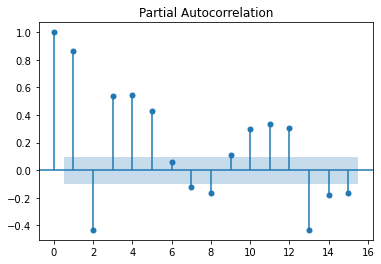

In [38]:
plot_pacf(df2['Value'], lags=15)

In [39]:
df2['t'] =  df2['Value'].shift(1)

In [40]:
df2.head()

,DATE,Value,t
0,1985-01-01,72.5052,NaN
1,1985-02-01,70.6720,72.5052
2,1985-03-01,62.4502,70.6720
3,1985-04-01,57.4714,62.4502
4,1985-05-01,55.3151,57.4714


In [41]:
train, test = df2[1:df2.shape[0]-7], df2[df2.shape[0]-7:]

In [42]:
train_X, train_y = train['t'], train['Value']
test_X, test_y = test['t'], test['Value']

In [43]:
train, test = df2.Value[1:df2.shape[0]-7], df2.Value[df2.shape[0]-7:]

In [44]:
train.shape

(389,)

In [45]:
test.shape

(7,)

In [46]:
from statsmodels.tsa.ar_model import AR

In [47]:
model = AR(train)
model_fit = model.fit()

C:\Users\kverm\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [48]:
model

In [50]:
model_fit

In [51]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [52]:
predictions

390    112.890539
391    114.180417
392    100.161869
393     90.982505
394     94.492001
395    110.161646
396    113.758745
dtype: float64

In [53]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

44.4411643824915

In [54]:
from matplotlib import pyplot

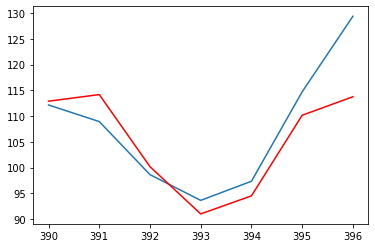

In [55]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      V  -                  a                  l
Model:                         AR(17)   Log Likelihood                -874.997
Method:                          cmle   S.D. of innovations              7.391
Date:                Wed, 24 Nov 2021   AIC                              4.103
Time:                        22:33:47   BIC                              4.303
Sample:                             0   HQIC                             4.182
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2652      2.983      1.095      0.274      -2.582       9.112
L1.Value       0.5911      0.155      3.812      0.000       0.287       0.895
L2.Value      -0.1398      0.180     -0.777      0.437      -0.492       0.213
L3.Value       0.1647      0.179      0.923      0.356      -0.185       0.515
L4.Value      -0.0899      0.184     -0.489      0.625      -0.450       0.270
L5.Value       0.0392      0.180      0.217      0.828      -0.314       0.393
L6.Value      -0.0214      0.153     -0.139      0.889      -0.322       0.279
L7.Value       0.0787      0.153      0.514      0.607      -0.221       0.379
L8.Value      -0.0384      0.154     -0.250      0.802      -0.340       0.263
L9.Value      -0.0573      0.154     -0.373      0.709      -0.358       0.244
L10.Value      0.0255      0.154      0.166      0.868      -0.276       0.327
L11.Value      0.1308      0.154      0.852      0.394      -0.170       0.432
L12.Value      0.6055      0.155      3.909      0.000       0.302       0.909
L13.Value     -0.3470      0.181     -1.915      0.056      -0.702       0.008
L14.Value      0.1073      0.189      0.567      0.571      -0.264       0.478
L15.Value     -0.2354      0.189     -1.247      0.213      -0.605       0.135
L16.Value      0.1071      0.192      0.557      0.577      -0.270       0.484
L17.Value      0.0488      0.162      0.302      0.763      -0.268       0.366
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0056           -0.0000j            1.0056           -0.0000
AR.2             0.8879           -0.5250j            1.0315           -0.0850
AR.3             0.8879           +0.5250j            1.0315            0.0850
AR.4             0.4992           -0.8663j            0.9998           -0.1668
AR.5             0.4992           +0.8663j            0.9998            0.1668
AR.6             1.3125           -0.5544j            1.4248           -0.0636
AR.7             1.3125           +0.5544j            1.4248            0.0636
AR.8             0.0019           -1.0434j            1.0434           -0.2497
AR.9             0.0019           +1.0434j            1.0434            0.2497
AR.10           -1.0443           -0.0000j            1.0443           -0.5000
AR.11           -0.8994           -0.5034j            1.0307           -0.4188
AR.12           -0.8994           +0.5034j            1.0307            0.4188
AR.13           -0.5824           -0.9048j            1.0761           -0.3410
AR.14           -0.5824           +0.9048j            1.0761            0.3410
AR.15           -0.3973           -1.2715j            1.3321           -0.2982
AR.16           -0.3973           +1.2715j            1.3321            0.2982
AR

In [57]:
residuals = model_fit.resid

<AxesSubplot:>

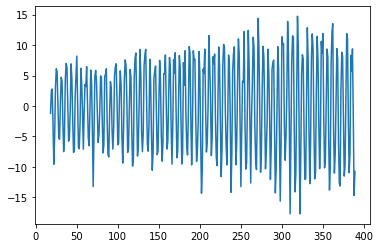

In [58]:
residuals.plot()

In [59]:
yhat=model_fit.predict()

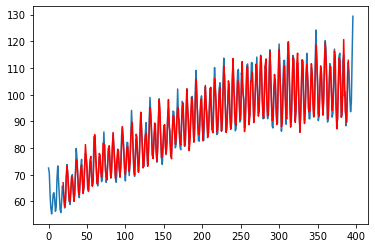

In [60]:
pyplot.plot(df2['Value'])
pyplot.plot(yhat, color='red')